<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">


# Introduction to Computing for Engineers and Computer Scientists<BR><BR>Continuing with OO Applications

## Questions, Discussion

### Piazza

### From Class

## The Strage Island of Dr. Ferguson Continues

### Status

| <img src="https://upload.wikimedia.org/wikipedia/commons/7/73/IslandOfDrMoreau.JPG"> |
| :---: |
| __Strange Islands__ |

<u>Island so Far</u>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import random
from operator import itemgetter, attrgetter, methodcaller

default_fig_size = (10,10)
default_marker_size = 50

class Environment(object):

    # The maximum values for (x,y) positions in the environment.
    # These are public (visible outside the class)
    x_max = 100
    y_max = 100

    def __init__(self, name, max_x=x_max, max_y=y_max):
        """
        Initialize an instance of the environment.
        :param x_max: Maximum value for x position
        :param y_max: Same for y.
        :param name: Friendly name
        """

        self.x_max = max_x
        self.y_max = max_y

        self.__organisms = []
        self.name = name

        # This represents the number of time clicks since creation
        self.current_time = 0

    def add_organism(self, thing):
        self.__organisms.append(thing)

    def remove_organism(self, thing):
        self.__organisms.remove(thing)


    def __str__(self):
        s = "name={}, x_max={}, y_max={}, population={}\n".format(self.name, self.x_max, self.y_max, \
                                                                  len(self.__organisms))
        s += "Organisms:\n"
        for a in sorted(self.__organisms, key=lambda o: o.organism_id):
            s += "{}".format(a) + "\n"
        return s

    def plot(self):

        # Build the individual scatter plot data for each kind of thing

        # Need to build a data structure of the form [color, marker, [(x.y) points] for each type of thing.
        # Will use a dictionary with key = kind of animal.
        o_kinds = dict()

        for a in self.__organisms:

            k = a.kind
            v = o_kinds.get(k)

            # If we have not seen this kind, make a new dictionary entry.
            if v is None:
                v = [a.plot_color, a.plot_symbol, [], [], a.kind]

            # Add x and y positions to the data structure.
            v[2].append(a.get_position()[0])
            v[3].append(a.get_position()[1])

            # Update the dictionary entry.
            o_kinds[k] = v

        # At this point, I should start thinking about decomposing this into two functions.
        # It is really doing two things.
        # Getting the plot information, and then doing the scatter plots.

        fig = plt.figure(figsize=default_fig_size)
        ax = plt.axes(xlim=(0, Environment.x_max), ylim=(0, Environment.y_max))

        # I will need copies of the scatters for the future.
        self.scatters = dict()

        keys = o_kinds.keys()
        for k in keys:
            v = o_kinds.get(k)
            x = v[2]
            y = v[3]
            c = v[0]
            m = v[1]
            s = ax.scatter(x, y, color=c, marker=m, s=default_marker_size, label=v[4])

        ax.legend()
        plt.show()

    def update(self):
        self.current_time += 1
        for a in self.__organisms:
            a.update(self.current_time)


class Island(Environment):

    def __init__(self, name, max_x=Environment.x_max, max_y=Environment.y_max):
        Environment.__init__(self, name, max_x, max_y)


class Organism(object):

    __next_id = 0 # Used to give each animal and ID

    default_organism = "UNKNOWN"
    plot_color = "k"
    plot_symbol = "o"

    # These are the default values for state values.
    default_lifetime = 1000
    default_starvation_time = 100
    default_time_between_birth = 100

    # In a more complex system, we would have organism and then add plottability in a subclass.
    # There is a separation of concerns: simulating organisms versus plotting/animating organisms

    def __init__(self, env, kind=default_organism, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        """
        Create an organism in a an environment.
        :param env: The environment
        :param kind: Kind is string naming the kind.
        :param pos: (x,y) position. If none, place randomly
        """

        self.env = env
        self.kind = kind
        self.organism_id = Organism.__next_id
        Organism.__next_id += 1

        if pos is None:
            x_pos = np.random.choice(env.x_max)
            y_pos = np.random.choice(env.y_max)
            self.position = (x_pos, y_pos)

        self.lifetime = lifetime
        self.starvation_time = starvation_time
        self.birth_delay = birth_delay

        now = self.env.current_time

        if not self.lifetime == -1:
            self.death_time = now + np.random.choice(self.lifetime)
        if not self.starvation_time == -1:
            self.will_starve_time = now + np.random.choice(self.starvation_time)
        if not self.birth_delay == -1:
            self.will_birth_time = now + np.random.choice(self.birth_delay)

        env.add_organism(self)

    def __str__(self):
        s = "id={}, kind={}, pos={}, death_time={}, will_starve_time={}, will_birth_time={}".format(
            self.organism_id, self.kind, self.position, self.death_time, self.will_starve_time, self.will_birth_time)
        return s

    def get_position(self):
        return self.position

    def update(self, now):
        if self.lifetime != -1:
            if now > self.death_time:
                print("{}: Organism died: {}".format(now, self))
                self.env.remove_organism(self)


class Plant(Organism):

    default_kind = "PLANT"
    plot_color = "g"
    plot_symbol = "s"

    default_lifetime =  Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        Organism.__init__(self, env, Plant.default_kind, pos,
                          lifetime, starvation_time, birth_delay)
        self.plot_color = Plant.plot_color
        self.plot_symbol = Plant.plot_symbol


class Animal(Organism):
    default_kind = "ANIMAL"
    plot_color = "m"
    plot_symbol = "^"

    # These are the default values for state values.
    default_lifetime = Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Organism.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Animal.plot_color
        self.plot_symbol = Animal.plot_symbol


class Predator(Animal):

    default_kind = "PREDATOR"
    plot_color = "r"
    plot_symbol = "8"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Predator.plot_color
        self.plot_symbol = Predator.plot_symbol


class Prey(Animal):
    default_kind = "PREY"
    plot_color = "b"
    plot_symbol = "x"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Prey.plot_color
        self.plot_symbol = Prey.plot_symbol

def test1():

    isle = Island("MyIsland")
    for i in range(0,10):
        a = Organism(isle)

    print(isle)


def test2():

    isle = Island("MyIsland")
    for i in range(0, 3):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)

    print(isle)

def test3():

    isle = Island("MyIsland")
    for i in range(0, 6):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)

    print("Island = ", isle)
    isle.plot()


def test4():
    isle = Island("MyIsland")
    for i in range(0, 6):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)

    print("Island = ", isle)

    for i in range(0, 2000):
        isle.update()

test4()

Island =  name=MyIsland, x_max=100, y_max=100, population=18
Organisms:
id=0, kind=PLANT, pos=(51, 34), death_time=45, will_starve_time=91, will_birth_time=96
id=1, kind=PREDATOR, pos=(33, 27), death_time=436, will_starve_time=70, will_birth_time=27
id=2, kind=PREY, pos=(50, 86), death_time=730, will_starve_time=40, will_birth_time=82
id=3, kind=PLANT, pos=(26, 2), death_time=80, will_starve_time=80, will_birth_time=12
id=4, kind=PREDATOR, pos=(86, 83), death_time=443, will_starve_time=23, will_birth_time=72
id=5, kind=PREY, pos=(45, 26), death_time=912, will_starve_time=34, will_birth_time=83
id=6, kind=PLANT, pos=(8, 78), death_time=974, will_starve_time=55, will_birth_time=66
id=7, kind=PREDATOR, pos=(61, 73), death_time=975, will_starve_time=88, will_birth_time=37
id=8, kind=PREY, pos=(15, 84), death_time=169, will_starve_time=62, will_birth_time=84
id=9, kind=PLANT, pos=(87, 70), death_time=847, will_starve_time=55, will_birth_time=8
id=10, kind=PREDATOR, pos=(74, 96), death_time=

- Status:
    - We have an environment and organisms
    - We can randomly create them and assign lifetimes.
    - We can simulate time and eventualy death.
    - We can plot positions.

Island =  name=MyIsland, x_max=100, y_max=100, population=18
Organisms:
id=18, kind=PLANT, pos=(45, 30), death_time=347, will_starve_time=48, will_birth_time=89
id=19, kind=PREDATOR, pos=(35, 78), death_time=841, will_starve_time=82, will_birth_time=27
id=20, kind=PREY, pos=(59, 60), death_time=212, will_starve_time=50, will_birth_time=70
id=21, kind=PLANT, pos=(66, 99), death_time=758, will_starve_time=67, will_birth_time=76
id=22, kind=PREDATOR, pos=(69, 12), death_time=914, will_starve_time=51, will_birth_time=16
id=23, kind=PREY, pos=(15, 45), death_time=855, will_starve_time=4, will_birth_time=93
id=24, kind=PLANT, pos=(63, 86), death_time=636, will_starve_time=8, will_birth_time=36
id=25, kind=PREDATOR, pos=(1, 57), death_time=149, will_starve_time=50, will_birth_time=28
id=26, kind=PREY, pos=(16, 99), death_time=342, will_starve_time=83, will_birth_time=20
id=27, kind=PLANT, pos=(47, 63), death_time=193, will_starve_time=31, will_birth_time=76
id=28, kind=PREDATOR, pos=(64, 9), 

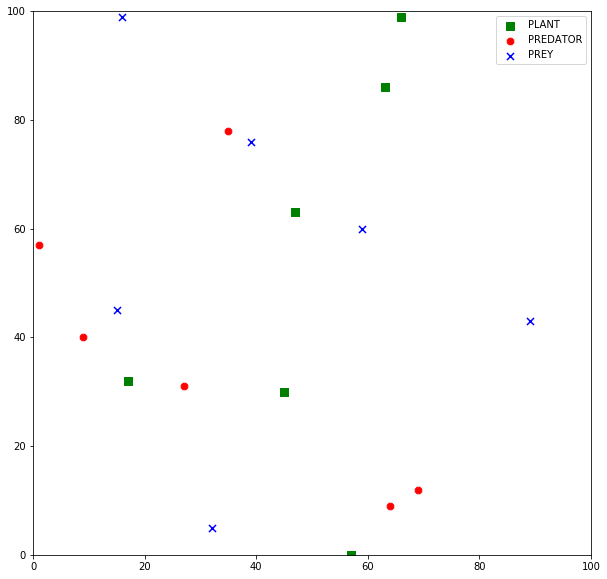

In [2]:
def test3():

    isle = Island("MyIsland")
    for i in range(0, 6):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)

    print("Island = ", isle)
    isle.plot()
    
test3()

| <img src="../images/wolf_moose_joke.jpeg"> |
| :---: |
| __Status__ |

- Actually, let's move around and animate first. Then starvation and being eaten.

| <img src="../images/moose1.jpeg"> |
| :---: |
| __Status__ |

### Movement

- Add update to Animal.
    - Move
    - Call parent for death, etc.
    
__islandsim5__

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import random
from operator import itemgetter, attrgetter, methodcaller

default_fig_size = (10,10)
default_marker_size = 50

class Environment(object):

    # The maximum values for (x,y) positions in the environment.
    # These are public (visible outside the class)
    x_max = 100
    y_max = 100

    def __init__(self, name, max_x=x_max, max_y=y_max):
        """
        Initialize an instance of the environment.
        :param x_max: Maximum value for x position
        :param y_max: Same for y.
        :param name: Friendly name
        """

        self.x_max = max_x
        self.y_max = max_y

        self.__organisms = []
        self.name = name

        # This represents the number of time clicks since creation
        self.current_time = 0

    def add_organism(self, thing):
        self.__organisms.append(thing)

    def remove_organism(self, thing):
        self.__organisms.remove(thing)


    def __str__(self):
        s = "name={}, x_max={}, y_max={}, population={}\n".format(self.name, self.x_max, self.y_max, \
                                                                  len(self.__organisms))
        s += "Organisms:\n"
        for a in sorted(self.__organisms, key=lambda o: o.organism_id):
            s += "{}".format(a) + "\n"
        return s

    def plot(self):

        # Build the individual scatter plot data for each kind of thing

        # Need to build a data structure of the form [color, marker, [(x.y) points] for each type of thing.
        # Will use a dictionary with key = kind of animal.
        o_kinds = dict()

        for a in self.__organisms:

            k = a.kind
            v = o_kinds.get(k)

            # If we have not seen this kind, make a new dictionary entry.
            if v is None:
                v = [a.plot_color, a.plot_symbol, [], [], a.kind]

            # Add x and y positions to the data structure.
            v[2].append(a.get_position()[0])
            v[3].append(a.get_position()[1])

            # Update the dictionary entry.
            o_kinds[k] = v

        # At this point, I should start thinking about decomposing this into two functions.
        # It is really doing two things.
        # Getting the plot information, and then doing the scatter plots.

        fig = plt.figure(figsize=default_fig_size)
        ax = plt.axes(xlim=(0, Environment.x_max), ylim=(0, Environment.y_max))

        # I will need copies of the scatters for the future.
        self.scatters = dict()

        keys = o_kinds.keys()
        for k in keys:
            v = o_kinds.get(k)
            x = v[2]
            y = v[3]
            c = v[0]
            m = v[1]
            s = ax.scatter(x, y, color=c, marker=m, s=default_marker_size, label=v[4])

        ax.legend()
        plt.show()

    def update(self):
        self.current_time += 1
        for a in self.__organisms:
            a.update(self.current_time)


class Island(Environment):

    def __init__(self, name, max_x=Environment.x_max, max_y=Environment.y_max):
        Environment.__init__(self, name, max_x, max_y)


class Organism(object):

    __next_id = 0 # Used to give each animal and ID

    default_organism = "UNKNOWN"
    plot_color = "k"
    plot_symbol = "o"

    # These are the default values for state values.
    default_lifetime = 1000
    default_starvation_time = 100
    default_time_between_birth = 100

    # In a more complex system, we would have organism and then add plottability in a subclass.
    # There is a separation of concerns: simulating organisms versus plotting/animating organisms

    def __init__(self, env, kind=default_organism, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        """
        Create an organism in a an environment.
        :param env: The environment
        :param kind: Kind is string naming the kind.
        :param pos: (x,y) position. If none, place randomly
        """

        self.env = env
        self.kind = kind
        self.organism_id = Organism.__next_id
        Organism.__next_id += 1

        if pos is None:
            x_pos = np.random.choice(env.x_max)
            y_pos = np.random.choice(env.y_max)
            self.position = (x_pos, y_pos)

        self.lifetime = lifetime
        self.starvation_time = starvation_time
        self.birth_delay = birth_delay

        now = self.env.current_time

        if not self.lifetime == -1:
            self.death_time = now + np.random.choice(self.lifetime)
        if not self.starvation_time == -1:
            self.will_starve_time = now + np.random.choice(self.starvation_time)
        if not self.birth_delay == -1:
            self.will_birth_time = now + np.random.choice(self.birth_delay)

        env.add_organism(self)

    def __str__(self):
        s = "id={}, kind={}, pos={}, death_time={}, will_starve_time={}, will_birth_time={}".format(
            self.organism_id, self.kind, self.position, self.death_time, self.will_starve_time, self.will_birth_time)
        return s

    def get_position(self):
        return self.position

    def update(self, now):
        if self.lifetime != -1:
            if now > self.death_time:
                print("{}: Organism died: {}".format(now, self))
                self.env.remove_organism(self)


class Plant(Organism):

    default_kind = "PLANT"
    plot_color = "g"
    plot_symbol = "s"

    default_lifetime =  Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        Organism.__init__(self, env, Plant.default_kind, pos,
                          lifetime, starvation_time, birth_delay)
        self.plot_color = Plant.plot_color
        self.plot_symbol = Plant.plot_symbol


class Animal(Organism):
    default_kind = "ANIMAL"
    plot_color = "m"
    plot_symbol = "^"

    # These are the default values for state values.
    default_lifetime = Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Organism.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Animal.plot_color
        self.plot_symbol = Animal.plot_symbol

    # This is too hard coded and would be generalized.
    def move(self, now):

        p = self.get_position()
        x = p[0]
        y = p[1]

        delta_x = np.random.choice([-1,1])
        delta_y = np.random.choice([-1,1])

        x = (x + delta_x) % self.env.x_max
        y = (y + delta_y) % self.env.y_max

        self.position = (x,y)

        print("{} Animal Moved: {}".format(now, self))

    def update(self, now):
        self.move(now)
        Organism.update(self, now)


class Predator(Animal):

    default_kind = "PREDATOR"
    plot_color = "r"
    plot_symbol = "8"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Predator.plot_color
        self.plot_symbol = Predator.plot_symbol


class Prey(Animal):
    default_kind = "PREY"
    plot_color = "b"
    plot_symbol = "x"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Prey.plot_color
        self.plot_symbol = Prey.plot_symbol


def test5():
    isle = Island("MyIsland")
    b = Predator(isle)

    print("Island = ", isle)

    for i in range(0, 100):
        isle.update()
        print(isle)

test5()

Island =  name=MyIsland, x_max=100, y_max=100, population=1
Organisms:
id=0, kind=PREDATOR, pos=(54, 56), death_time=53, will_starve_time=68, will_birth_time=86

1 Animal Moved: id=0, kind=PREDATOR, pos=(53, 55), death_time=53, will_starve_time=68, will_birth_time=86
name=MyIsland, x_max=100, y_max=100, population=1
Organisms:
id=0, kind=PREDATOR, pos=(53, 55), death_time=53, will_starve_time=68, will_birth_time=86

2 Animal Moved: id=0, kind=PREDATOR, pos=(52, 54), death_time=53, will_starve_time=68, will_birth_time=86
name=MyIsland, x_max=100, y_max=100, population=1
Organisms:
id=0, kind=PREDATOR, pos=(52, 54), death_time=53, will_starve_time=68, will_birth_time=86

3 Animal Moved: id=0, kind=PREDATOR, pos=(51, 55), death_time=53, will_starve_time=68, will_birth_time=86
name=MyIsland, x_max=100, y_max=100, population=1
Organisms:
id=0, kind=PREDATOR, pos=(51, 55), death_time=53, will_starve_time=68, will_birth_time=86

4 Animal Moved: id=0, kind=PREDATOR, pos=(50, 56), death_time=53

### Integration $-$ Let's Put the Pieces (So Far) Together.


__Demo__



__islandsim6__

In [17]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import random
from operator import itemgetter, attrgetter, methodcaller

default_fig_size = (10, 10)
default_marker_size = 50


class Environment(object):
    # The maximum values for (x,y) positions in the environment.
    # These are public (visible outside the class)
    x_max = 100
    y_max = 100

    def __init__(self, name, max_x=x_max, max_y=y_max):
        """
        Initialize an instance of the environment.
        :param x_max: Maximum value for x position
        :param y_max: Same for y.
        :param name: Friendly name
        """

        self.plotted = False

        self.x_max = max_x
        self.y_max = max_y

        self.__organisms = []
        self.name = name

        # This represents the number of time clicks since creation
        self.current_time = 0

    def add_organism(self, thing):
        self.__organisms.append(thing)

    def remove_organism(self, thing):
        self.__organisms.remove(thing)
        
    def get_population(self):
        return len(self.__organisms)
    
    def get_organisms(self):
        return self.__organisms

    def __str__(self):
        s = "name={}, x_max={}, y_max={}, population={}\n".format(self.name, self.x_max, self.y_max, \
                                                                  len(self.__organisms))
        s += "Organisms:\n"
        for a in sorted(self.__organisms, key=lambda o: o.organism_id):
            s += "{}".format(a) + "\n"
        return s

    def get_plot_data(self):
        o_kinds = dict()

        for a in self.__organisms:

            k = a.kind
            v = o_kinds.get(k)

            # If we have not seen this kind, make a new dictionary entry.
            if v is None:
                v = [a.plot_color, a.plot_symbol, [], [], a.kind]

            # Add x and y positions to the data structure.
            v[2].append(a.get_position()[0])
            v[3].append(a.get_position()[1])

            # Update the dictionary entry.
            o_kinds[k] = v

        return o_kinds

    def update_plot(self):

        if self.plotted:

            # This could get messed up because of dictionary order but is probably OK.
            # This is part of the reason I will switch to sparese matrices.
            o_kinds = self.get_plot_data()
            for key in o_kinds:
                sp = self.scatters.get(key)
                pd = o_kinds[key]
                z = list(zip(pd[2], pd[3]))
                sp.set_offsets(z)

            keys = self.scatters.keys()
            for k in keys:
                p = o_kinds.get(k)
                if p is None:
                    s = self.scatters.get(k)
                    s.set_offsets([-1,-1])

    def plot(self):

        self.plotted = True

        # Build the individual scatter plot data for each kind of thing

        # Need to build a data structure of the form [color, marker, [(x.y) points] for each type of thing.
        # Will use a dictionary with key = kind of animal.


        o_kinds = self.get_plot_data()

        fig = plt.figure(figsize=default_fig_size)
        ax = plt.axes(xlim=(0, Environment.x_max), ylim=(0, Environment.y_max))

        # I will need copies of the scatters for the future.
        self.scatters = dict()

        keys = o_kinds.keys()
        for k in keys:
            v = o_kinds.get(k)
            x = v[2]
            y = v[3]
            c = v[0]
            m = v[1]
            s = ax.scatter(x, y, color=c, marker=m, s=default_marker_size, label=v[4])
            self.scatters[v[4]] = s

        ax.legend()

        anim = FuncAnimation(fig, self.update, fargs=[self], interval=100)
        plt.show()


    def update(t, p, env):
        env.current_time += 1
        for a in env.__organisms:
            a.update(env.current_time)

        if len(env.__organisms) == 0:
            print("Everything is dead.")
            
        env.update_plot()
        print(env)


class Island(Environment):
    def __init__(self, name, max_x=Environment.x_max, max_y=Environment.y_max):
        Environment.__init__(self, name, max_x, max_y)


class Organism(object):
    __next_id = 0  # Used to give each animal and ID

    default_organism = "UNKNOWN"
    plot_color = "k"
    plot_symbol = "o"

    # These are the default values for state values.
    default_lifetime = 1000
    default_starvation_time = 100
    default_time_between_birth = 100

    # In a more complex system, we would have organism and then add plottability in a subclass.
    # There is a separation of concerns: simulating organisms versus plotting/animating organisms

    def __init__(self, env, kind=default_organism, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        """
        Create an organism in a an environment.
        :param env: The environment
        :param kind: Kind is string naming the kind.
        :param pos: (x,y) position. If none, place randomly
        """

        self.env = env
        self.kind = kind
        self.organism_id = Organism.__next_id
        Organism.__next_id += 1

        if pos is None:
            x_pos = np.random.choice(env.x_max)
            y_pos = np.random.choice(env.y_max)
            self.position = (x_pos, y_pos)

        self.lifetime = lifetime
        self.starvation_time = starvation_time
        self.birth_delay = birth_delay

        now = self.env.current_time

        if not self.lifetime == -1:
            self.death_time = now + np.random.choice(self.lifetime)
        else:
            self.death_time = -1
        if not self.starvation_time == -1:
            self.will_starve_time = now + np.random.choice(self.starvation_time)
        else:
            self.will_starve_time = -1
        if not self.birth_delay == -1:
            self.will_birth_time = now + np.random.choice(self.birth_delay)
        else:
            self.will_birth_time = -1

        env.add_organism(self)

    def __str__(self):
        s = "id={}, kind={}, pos={}, death_time={}, will_starve_time={}, will_birth_time={}".format(
            self.organism_id, self.kind, self.position, self.death_time, self.will_starve_time, self.will_birth_time)
        return s

    def get_position(self):
        return self.position

    def update(self, now):
        if self.lifetime != -1:
            if now > self.death_time:
                print("{}: Organism died: {}".format(now, self))
                self.env.remove_organism(self)


class Plant(Organism):
    default_kind = "PLANT"
    plot_color = "g"
    plot_symbol = "s"

    default_lifetime = Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth
                 ):
        Organism.__init__(self, env, Plant.default_kind, pos,
                          lifetime, starvation_time, birth_delay)
        self.plot_color = Plant.plot_color
        self.plot_symbol = Plant.plot_symbol


class Animal(Organism):
    default_kind = "ANIMAL"
    plot_color = "m"
    plot_symbol = "^"

    # These are the default values for state values.
    default_lifetime = Organism.default_lifetime
    default_starvation_time = Organism.default_starvation_time
    default_time_between_birth = Organism.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Organism.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Animal.plot_color
        self.plot_symbol = Animal.plot_symbol

    # This is too hard coded and would be generalized.
    def move(self, now):
        p = self.get_position()
        x = p[0]
        y = p[1]

        delta_x = np.random.choice([-1, 1])
        delta_y = np.random.choice([-1, 1])

        x = (x + delta_x) % self.env.x_max
        y = (y + delta_y) % self.env.y_max

        self.position = (x, y)

        #print("{} Animal Moved: {}".format(now, self))

    def update(self, now):
        self.move(now)
        Organism.update(self, now)


class Predator(Animal):
    default_kind = "PREDATOR"
    plot_color = "r"
    plot_symbol = "8"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Predator.plot_color
        self.plot_symbol = Predator.plot_symbol


class Prey(Animal):
    default_kind = "PREY"
    plot_color = "b"
    plot_symbol = "x"

    # These are the default values for state values.
    default_lifetime = Animal.default_lifetime
    default_starvation_time = Animal.default_starvation_time
    default_time_between_birth = Animal.default_time_between_birth

    def __init__(self, env, kind=default_kind, pos=None,
                 lifetime=default_lifetime, starvation_time=default_starvation_time,
                 birth_delay=default_time_between_birth):
        Animal.__init__(self, env, kind, pos, lifetime, starvation_time, birth_delay)
        self.plot_color = Prey.plot_color
        self.plot_symbol = Prey.plot_symbol




In [ ]:
def test6():
    isle = Island("MyIsland")

    for i in range(0,30):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)

    #print(isle)
    isle.plot()


### Let's Take a Breath and Assess

|<img src="../images/pred001.jpeg">|
| :---: |
| __Object Model Reminder__ |

- We built a relatively simple OO application. The object model included
    - Subclassing and inheritance
    - Relationships.
    
    
- We developed some insight into inheritance, abstraction, encapsulation and attribute/method placement in an OO class hierarchy, e.g. 
    - Death, starvation, (eventually birth) in organism.
    - Movement in Animal
    - Plottable and position awareness (Organism)
    
    
- Polymorphism: The Island treats all of the organisms the same way, independent of implementation class.


- We got a quick overview of plotting, _but more importantly the value of OO as an interface into a complex module.__

### Next Step $-$ A Data Structure

- Start simulating interactions between organisms.


- The first step is being able to access an environments organisms in very flexible ways.
    - Iterate through all organisms asking them to "update themselves."
    - Find specific kinds of organisms.
    - Find out which organisms are in a cell, and which cells have more than one organism.
    
    
- This is a __data structure__ design problem. 


- "In computer science, a data structure is a particular way of organizing and storing data in a computer so that it can be accessed and modified efficiently." (https://en.wikipedia.org/wiki/Data_structure)


- I have a pretty good handle on how to keep lists of organisms.

In [18]:
def test7():
    isle = Island("MyIsland")

    for i in range(0,30):
        a = Plant(isle)
        b = Predator(isle)
        c = Prey(isle)
        
    return isle

In [19]:
my_island = test7()

In [20]:
my_island.get_population()

90

In [26]:
x = [o for o in my_island.get_organisms() if o.kind == "PREY"]
print(str(x[2]))

id=8, kind=PREY, pos=(80, 90), death_time=608, will_starve_time=19, will_birth_time=10


In [27]:
print("No of prey = ", len(x))

No of prey =  30


- But, I also want to be able to ask questions about (i,j) locations. Challenges:
    - I do not want a piece of data or holding place for each cell.
    - There are 100x100 cells == 10,000.
    - There are only 90 organisms.
    

- These are relatively small numbers, but could be huge in real simulations.

In [38]:
import sys

print("Island size is = ", sys.getsizeof(my_island))
t = sum(map(sys.getsizeof, x))
print("All of my organisms' total size is = ", t)

Island size is =  56
All of my organisms' total size is =  1680


In [40]:
temp = []
total_size = 0
for i in range(0,100):
    r = []
    for j in range(0,100):
        r.append(None)
        total_size += sys.getsizeof(None)
    temp.append(r)
print("(i,j) = ", temp[i][j])
print("total size = ", total_size)

(i,j) =  None
total size =  160000


- These numbers are not very accurate because I need to implement the \_\_sizeof()\_\_ method to be more accurate.


- But you get the basic idea. Using an (i,j) list of lists to keep track of cells is mostly wasted space
    - 10,000 cells
    - 90 organisms $\Rightarrow$ taking up stored for 9,910 cells that are empty.
    
    
- Thus, we want a data structure that is both
    - A list
    - A matrix
    - Only uses storage for matrix entries that have data.
    - We will cover as an example of a data structure and space/time trade-off after HW5 is complete.